

**1. Scrape Twitter Data for Adidas Tweets**

In [3]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

import string
import re
import textblob
from textblob import TextBlob

from wordcloud import WordCloud, STOPWORDS

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [4]:
import pandas as pd

# creates a pandas dataframe
df = pd.read_csv('/content/drive/MyDrive/BE Experiments/SMA/Adidas.csv')


In [5]:
df.head()


,id,tweetid,guid,link,author,title,description,pubdate,source,favorite_count,...,user_id,profile_image_url,user_statuses_count,user_friends_count,user_followers_count,user_created_at,user_bio,user_location,user_verified,Unnamed: 29
0,1,1650105908918366210,https://twitter.com/Matt70541475/statuses/1650...,https://twitter.com/Matt70541475/statuses/1650...,Matt70541475,@big_fish Does anyone actually wear Adidas any...,@big_fish Does anyone actually wear Adidas any...,2023-04-23 07:54:40,Twitter for Android,0,...,943668412751822849,https://pbs.twimg.com/profile_images/163454552...,4556,2926,839,2017-12-20 21:24:16,NaN,NaN,NaN,NaN
1,2,1650105862604611586,https://twitter.com/AbbyGle08549574/statuses/1...,https://twitter.com/AbbyGle08549574/statuses/1...,AbbyGle08549574,RT @phoenixselect: A few highlights from Phoen...,A few highlights from Phoenix 2027 win over Ad...,2023-04-23 07:54:29,Twitter for iPhone,0,...,1432532323770281988,https://abs.twimg.com/sticky/default_profile_i...,13,12,7,2021-08-30 22:35:03,NaN,NaN,NaN,NaN
2,3,1650105768392155138,https://twitter.com/re11ddy/statuses/165010576...,https://twitter.com/re11ddy/statuses/165010576...,re11ddy,"@adidasUK Unlike Nike, a real women. Buy Adida...","@adidasUK Unlike Nike, a real women. Buy Adida...",2023-04-23 07:54:07,Twitter for iPhone,0,...,843860654,https://abs.twimg.com/sticky/default_profile_i...,70380,3537,2704,2012-09-24 12:15:06,#backBoris ##backLiz🇬🇧 🇺🇦Great Britain and NI ...,UK,NaN,NaN
3,4,1650105581447921665,https://twitter.com/PJDouglas7/statuses/165010...,https://twitter.com/PJDouglas7/statuses/165010...,PJDouglas7,RT @IE2025Gold: Game 1 (Fri night) adidas gold...,Game 1 (Fri night) adidas gold Team Traditio...,2023-04-23 07:53:22,Twitter for iPhone,0,...,1104519473262981120,https://pbs.twimg.com/profile_images/160469938...,90,149,158,2019-03-09 18:08:58,6’5 190 SF/SG C/O 2025. GPA 3.7 JHS|,"Jeffersonville, IN",NaN,NaN
4,5,1650105535063023617,https://twitter.com/MemzMV/statuses/1650105535...,https://twitter.com/MemzMV/statuses/1650105535...,MemzMV,@proclubs_weekly The Adidas Fevernova 2002 Wor...,@proclubs_weekly The Adidas Fevernova 2002 Wor...,2023-04-23 07:53:11,Twitter for iPhone,0,...,1285846857042796545,https://pbs.twimg.com/profile_images/164247576...,4526,348,667,2020-07-22 04:00:26,FIFA Pro Clubs I Midfield Orchestra I Marco Ve...,NaN,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2500 non-null   int64  
 1   tweetid                  2500 non-null   int64  
 2   guid                     2500 non-null   object 
 3   link                     2500 non-null   object 
 4   author                   2500 non-null   object 
 5   title                    2500 non-null   object 
 6   description              2500 non-null   object 
 7   pubdate                  2500 non-null   object 
 8   source                   2500 non-null   object 
 9   favorite_count           2500 non-null   int64  
 10  retweet_count            2500 non-null   int64  
 11  lang                     2500 non-null   object 
 12  quoted_text              48 non-null     object 
 13  tweet_type               2500 non-null   object 
 14  in_reply_to_screen_name 

**2. Data Loading**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
print(df.shape)

(2500, 30)


**3. Twitter Data Cleaning , Preprocessing and Exploratory Data Analysis**

In [8]:
df.head()

,id,tweetid,guid,link,author,title,description,pubdate,source,favorite_count,...,user_id,profile_image_url,user_statuses_count,user_friends_count,user_followers_count,user_created_at,user_bio,user_location,user_verified,Unnamed: 29
0,1,1650105908918366210,https://twitter.com/Matt70541475/statuses/1650...,https://twitter.com/Matt70541475/statuses/1650...,Matt70541475,@big_fish Does anyone actually wear Adidas any...,@big_fish Does anyone actually wear Adidas any...,2023-04-23 07:54:40,Twitter for Android,0,...,943668412751822849,https://pbs.twimg.com/profile_images/163454552...,4556,2926,839,2017-12-20 21:24:16,NaN,NaN,NaN,NaN
1,2,1650105862604611586,https://twitter.com/AbbyGle08549574/statuses/1...,https://twitter.com/AbbyGle08549574/statuses/1...,AbbyGle08549574,RT @phoenixselect: A few highlights from Phoen...,A few highlights from Phoenix 2027 win over Ad...,2023-04-23 07:54:29,Twitter for iPhone,0,...,1432532323770281988,https://abs.twimg.com/sticky/default_profile_i...,13,12,7,2021-08-30 22:35:03,NaN,NaN,NaN,NaN
2,3,1650105768392155138,https://twitter.com/re11ddy/statuses/165010576...,https://twitter.com/re11ddy/statuses/165010576...,re11ddy,"@adidasUK Unlike Nike, a real women. Buy Adida...","@adidasUK Unlike Nike, a real women. Buy Adida...",2023-04-23 07:54:07,Twitter for iPhone,0,...,843860654,https://abs.twimg.com/sticky/default_profile_i...,70380,3537,2704,2012-09-24 12:15:06,#backBoris ##backLiz🇬🇧 🇺🇦Great Britain and NI ...,UK,NaN,NaN
3,4,1650105581447921665,https://twitter.com/PJDouglas7/statuses/165010...,https://twitter.com/PJDouglas7/statuses/165010...,PJDouglas7,RT @IE2025Gold: Game 1 (Fri night) adidas gold...,Game 1 (Fri night) adidas gold Team Traditio...,2023-04-23 07:53:22,Twitter for iPhone,0,...,1104519473262981120,https://pbs.twimg.com/profile_images/160469938...,90,149,158,2019-03-09 18:08:58,6’5 190 SF/SG C/O 2025. GPA 3.7 JHS|,"Jeffersonville, IN",NaN,NaN
4,5,1650105535063023617,https://twitter.com/MemzMV/statuses/1650105535...,https://twitter.com/MemzMV/statuses/1650105535...,MemzMV,@proclubs_weekly The Adidas Fevernova 2002 Wor...,@proclubs_weekly The Adidas Fevernova 2002 Wor...,2023-04-23 07:53:11,Twitter for iPhone,0,...,1285846857042796545,https://pbs.twimg.com/profile_images/164247576...,4526,348,667,2020-07-22 04:00:26,FIFA Pro Clubs I Midfield Orchestra I Marco Ve...,NaN,NaN,NaN


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

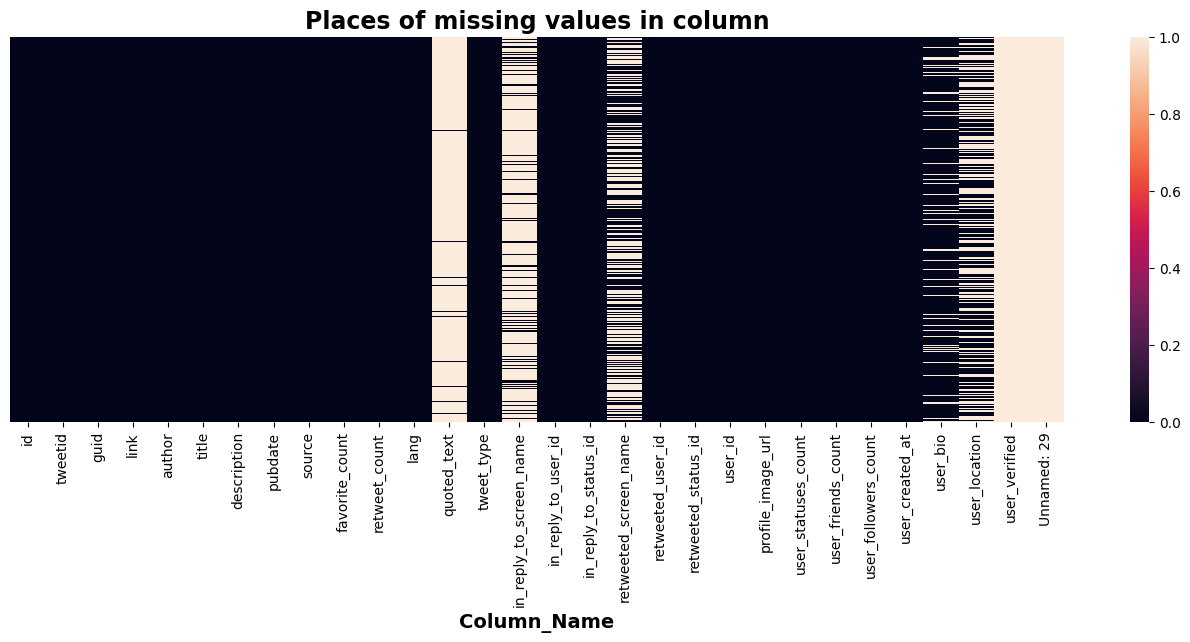

In [10]:
#Heat Map for missing values
plt.figure(figsize=(17, 5))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False)
plt.xlabel("Column_Name", size=14, weight="bold")
plt.title("Places of missing values in column",fontweight="bold",size=17)
plt.show()

In [11]:
import nltk

In [12]:
stop=nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**Twitter Data Cleaning and Preprocessing**

In [13]:
def pre_process(text):
    # Remove links
    text = re.sub('http://\S+|https://\S+', '', text)
    text = re.sub('http[s]?://\S+', '', text)
    text = re.sub(r"http\S+", "", text)

    # Convert HTML references
    text = re.sub('&amp', 'and', text)
    text = re.sub('&lt', '<', text)
    text = re.sub('&gt', '>', text)
  
    # Remove new line characters
    text = re.sub('[\r\n]+', ' ', text)
    
    # Remove mentions
    text = re.sub(r'@\w+', '', text)
    
    # Remove hashtags
    text = re.sub(r'#\w+', '', text)

    # Remove multiple space characters
    text = re.sub('\s+',' ', text)
    
    # Convert to lowercase
    text = text.lower()
    return text

In [14]:
df['processed_text'] = df['description'].apply(pre_process)

In [15]:
df['processed_text'].head()

0         does anyone actually wear adidas anymore.. 🤔
1    a few highlights from phoenix 2027 win over ad...
2     unlike nike, a real women. buy adidas. it’s r...
3    game 1 (fri night) adidas gold team tradition ...
4     the adidas fevernova 2002 world cup was speci...
Name: processed_text, dtype: object

In [17]:
df[['description','processed_text']]

,description,processed_text
0,@big_fish Does anyone actually wear Adidas any...,does anyone actually wear adidas anymore.. 🤔
1,A few highlights from Phoenix 2027 win over Ad...,a few highlights from phoenix 2027 win over ad...
2,"@adidasUK Unlike Nike, a real women. Buy Adida...","unlike nike, a real women. buy adidas. it’s r..."
3,Game 1 (Fri night) adidas gold Team Traditio...,game 1 (fri night) adidas gold team tradition ...
4,@proclubs_weekly The Adidas Fevernova 2002 Wor...,the adidas fevernova 2002 world cup was speci...
...,...,...
2495,Ran into my ex at LAX and I’m wearing a mens X...,ran into my ex at lax and i’m wearing a mens x...
2496,UNC commit Ian Jackson put in work earlier at ...,unc commit ian jackson put in work earlier at ...
2497,Adidas’s dropping him was a blessing . https:/...,adidas’s dropping him was a blessing .
2498,: How many Adidas shirt y\'all have? YinWar ...,: how many adidas shirt y\'all have? yinwar : ...


In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [19]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [20]:
common_words = get_top_n_bigram(df['processed_text'], 20)

In [21]:
print(common_words)

[('adidas 3ssb', 156), ('sneakers adidas', 124), ('adidas melting', 117), ('melting theater', 117), ('theater melting', 117), ('melting sadness', 117), ('sadness forum', 117), ('forum exhibit', 117), ('exhibit mid', 117), ('mid kokoro', 117), ('kokoro price', 117), ('price 17', 117), ('17 600', 117), ('600 zeenunewr', 117), ('restock adidas', 110), ('fear god', 110), ('nike adidas', 84), ('3ssb chapter', 84), ('adidas gold', 73), ('adidas originals', 71)]


In [22]:
df2 = pd.DataFrame(common_words, columns = ['TweetText' , 'count'])

In [23]:
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

## **4. Sentiment Analysis**

In [24]:
df2.head()

,TweetText,count
0,adidas 3ssb,156
1,sneakers adidas,124
2,adidas melting,117
3,melting theater,117
4,theater melting,117


In [25]:
df.head()

,id,tweetid,guid,link,author,title,description,pubdate,source,favorite_count,...,profile_image_url,user_statuses_count,user_friends_count,user_followers_count,user_created_at,user_bio,user_location,user_verified,Unnamed: 29,processed_text
0,1,1650105908918366210,https://twitter.com/Matt70541475/statuses/1650...,https://twitter.com/Matt70541475/statuses/1650...,Matt70541475,@big_fish Does anyone actually wear Adidas any...,@big_fish Does anyone actually wear Adidas any...,2023-04-23 07:54:40,Twitter for Android,0,...,https://pbs.twimg.com/profile_images/163454552...,4556,2926,839,2017-12-20 21:24:16,NaN,NaN,NaN,NaN,does anyone actually wear adidas anymore.. 🤔
1,2,1650105862604611586,https://twitter.com/AbbyGle08549574/statuses/1...,https://twitter.com/AbbyGle08549574/statuses/1...,AbbyGle08549574,RT @phoenixselect: A few highlights from Phoen...,A few highlights from Phoenix 2027 win over Ad...,2023-04-23 07:54:29,Twitter for iPhone,0,...,https://abs.twimg.com/sticky/default_profile_i...,13,12,7,2021-08-30 22:35:03,NaN,NaN,NaN,NaN,a few highlights from phoenix 2027 win over ad...
2,3,1650105768392155138,https://twitter.com/re11ddy/statuses/165010576...,https://twitter.com/re11ddy/statuses/165010576...,re11ddy,"@adidasUK Unlike Nike, a real women. Buy Adida...","@adidasUK Unlike Nike, a real women. Buy Adida...",2023-04-23 07:54:07,Twitter for iPhone,0,...,https://abs.twimg.com/sticky/default_profile_i...,70380,3537,2704,2012-09-24 12:15:06,#backBoris ##backLiz🇬🇧 🇺🇦Great Britain and NI ...,UK,NaN,NaN,"unlike nike, a real women. buy adidas. it’s r..."
3,4,1650105581447921665,https://twitter.com/PJDouglas7/statuses/165010...,https://twitter.com/PJDouglas7/statuses/165010...,PJDouglas7,RT @IE2025Gold: Game 1 (Fri night) adidas gold...,Game 1 (Fri night) adidas gold Team Traditio...,2023-04-23 07:53:22,Twitter for iPhone,0,...,https://pbs.twimg.com/profile_images/160469938...,90,149,158,2019-03-09 18:08:58,6’5 190 SF/SG C/O 2025. GPA 3.7 JHS|,"Jeffersonville, IN",NaN,NaN,game 1 (fri night) adidas gold team tradition ...
4,5,1650105535063023617,https://twitter.com/MemzMV/statuses/1650105535...,https://twitter.com/MemzMV/statuses/1650105535...,MemzMV,@proclubs_weekly The Adidas Fevernova 2002 Wor...,@proclubs_weekly The Adidas Fevernova 2002 Wor...,2023-04-23 07:53:11,Twitter for iPhone,0,...,https://pbs.twimg.com/profile_images/164247576...,4526,348,667,2020-07-22 04:00:26,FIFA Pro Clubs I Midfield Orchestra I Marco Ve...,NaN,NaN,NaN,the adidas fevernova 2002 world cup was speci...


In [26]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer


In [27]:
nltk.download('vader_lexicon')
# Instantiate new SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [28]:
from pandas.io.formats.info import DataFrameTableBuilderNonVerbose
df["Positive"] = [sid.polarity_scores(i)["pos"] for i in df["processed_text"]]
df["Negative"] = [sid.polarity_scores(i)["neg"] for i in df["processed_text"]]
df["Neutral"] = [sid.polarity_scores(i)["neu"] for i in df["processed_text"]]
# Generate sentiment scores
# sentiment_scores = df['description'].apply(sid.polarity_scores)
# sentiment_scores
df[['description','processed_text','Positive','Negative','Neutral']]

,description,processed_text,Positive,Negative,Neutral
0,@big_fish Does anyone actually wear Adidas any...,does anyone actually wear adidas anymore.. 🤔,0.000,0.000,1.000
1,A few highlights from Phoenix 2027 win over Ad...,a few highlights from phoenix 2027 win over ad...,0.391,0.000,0.609
2,"@adidasUK Unlike Nike, a real women. Buy Adida...","unlike nike, a real women. buy adidas. it’s r...",0.000,0.000,1.000
3,Game 1 (Fri night) adidas gold Team Traditio...,game 1 (fri night) adidas gold team tradition ...,0.088,0.000,0.912
4,@proclubs_weekly The Adidas Fevernova 2002 Wor...,the adidas fevernova 2002 world cup was speci...,0.062,0.185,0.753
...,...,...,...,...,...
2495,Ran into my ex at LAX and I’m wearing a mens X...,ran into my ex at lax and i’m wearing a mens x...,0.000,0.000,1.000
2496,UNC commit Ian Jackson put in work earlier at ...,unc commit ian jackson put in work earlier at ...,0.172,0.000,0.828
2497,Adidas’s dropping him was a blessing . https:/...,adidas’s dropping him was a blessing .,0.444,0.000,0.556
2498,: How many Adidas shirt y\'all have? YinWar ...,: how many adidas shirt y\'all have? yinwar : ...,0.252,0.000,0.748


# Once again Sentiment

In [31]:
import pandas as pd
from textblob import TextBlob

# Define a function to perform sentiment analysis on a tweet using TextBlob
def analyze_sentiment(tweet):
    # Create a TextBlob object for the tweet
    blob = TextBlob(tweet)
    
    # Use TextBlob to calculate the sentiment polarity of the tweet
    polarity = blob.sentiment.polarity
    
    # Return the sentiment polarity
    return polarity


# Apply the sentiment analysis function to each tweet in the DataFrame
df['sentiment'] = df['processed_text'].apply(analyze_sentiment)

# Print the resulting DataFrame
df['sentiment']



0       0.000000
1       0.293750
2       0.200000
3      -0.400000
4       0.357143
          ...   
2495   -0.100000
2496    0.000000
2497    0.000000
2498    0.500000
2499    0.000000
Name: sentiment, Length: 2500, dtype: float64

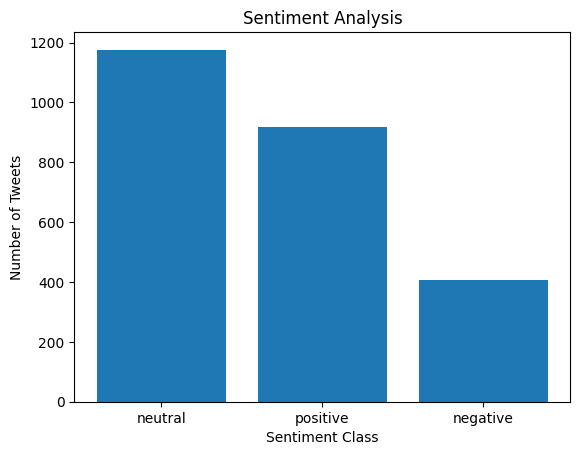

In [32]:
def classify_sentiment(polarity):
    if polarity > 0:
        return 'positive'
    elif polarity < 0:
        return 'negative'
    else:
        return 'neutral'

# Apply the classify_sentiment function to each sentiment polarity value in the DataFrame
df['sentiment_type'] = df['sentiment'].apply(classify_sentiment)


sentiment_counts = df['sentiment_type'].value_counts()

# Create a bar plot of the sentiment counts
plt.bar(sentiment_counts.index, sentiment_counts.values)

# Add a title and labels for the x and y axes
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment Class')
plt.ylabel('Number of Tweets')

# Show the plot
plt.show()

**Create Word Cloud**

In [33]:
very_positive_tweets = df[df['sentiment'] > 0.3]

# display only the tweet and sentiment score columns

In [34]:
very_positive_tweets.head()

,id,tweetid,guid,link,author,title,description,pubdate,source,favorite_count,...,user_bio,user_location,user_verified,Unnamed: 29,processed_text,Positive,Negative,Neutral,sentiment,sentiment_type
4,5,1650105535063023617,https://twitter.com/MemzMV/statuses/1650105535...,https://twitter.com/MemzMV/statuses/1650105535...,MemzMV,@proclubs_weekly The Adidas Fevernova 2002 Wor...,@proclubs_weekly The Adidas Fevernova 2002 Wor...,2023-04-23 07:53:11,Twitter for iPhone,0,...,FIFA Pro Clubs I Midfield Orchestra I Marco Ve...,NaN,NaN,NaN,the adidas fevernova 2002 world cup was speci...,0.062,0.185,0.753,0.357143,positive
6,7,1650105307995992064,https://twitter.com/THE_WEB3_CLUB/statuses/165...,https://twitter.com/THE_WEB3_CLUB/statuses/165...,THE_WEB3_CLUB,Gm ☀️ here are the top WEB3 news of the week 👇...,Gm ☀️ here are the top WEB3 news of the week 👇...,2023-04-23 07:52:17,Twitter for iPhone,2,...,🔨,Metaverse,NaN,NaN,gm ☀️ here are the top web3 news of the week 👇...,0.107,0.037,0.856,0.325000,positive
15,16,1650103146398601216,https://twitter.com/CompeteTraining/statuses/1...,https://twitter.com/CompeteTraining/statuses/1...,CompeteTraining,RT @JKOldham3: So proud of all our @FishersHoo...,So proud of all our @FishersHoops guys playing...,2023-04-23 07:43:42,Twitter for iPhone,0,...,Pro Basketball Trainers 🏀 Courtney: 2010 Miss ...,"Marion, IN",NaN,NaN,so proud of all our guys playing out in omaha ...,0.284,0.000,0.716,1.000000,positive
18,19,1650102436055457792,https://twitter.com/Lifeofkunta/statuses/16501...,https://twitter.com/Lifeofkunta/statuses/16501...,Lifeofkunta,@Elgenio_alberto Adidas na Nike ndo my favorite,@Elgenio_alberto Adidas na Nike ndo my favorite,2023-04-23 07:40:52,Twitter for Android,1,...,I Breath Football 😮‍💨| Banking & Finance 👨🏽‍🎓,"Dar es Salaam, Tanzania",NaN,NaN,adidas na nike ndo my favorite,0.375,0.000,0.625,0.500000,positive
20,21,1650102261115125760,https://twitter.com/SneakerScouts/statuses/165...,https://twitter.com/SneakerScouts/statuses/165...,SneakerScouts,#SneakerScouts The adidas Retropy E5 \'Better ...,#SneakerScouts The adidas Retropy E5 \'Better ...,2023-04-23 07:40:11,Hootsuite Inc.,0,...,"The #1 source for sneaker news, release dates,...",Worldwide,NaN,NaN,the adidas retropy e5 \'better scarlet\' is n...,0.000,0.000,1.000,0.500000,positive


In [51]:
very_negative_tweets = df[df['sentiment'] < 0]

In [52]:
very_negative_tweets.head()

,id,tweetid,guid,link,author,title,description,pubdate,source,favorite_count,...,user_friends_count,user_followers_count,user_created_at,user_bio,user_location,user_verified,Unnamed: 29,processed_text,sentiment,sentiment_type
3,4,1650105581447921665,https://twitter.com/PJDouglas7/statuses/165010...,https://twitter.com/PJDouglas7/statuses/165010...,PJDouglas7,RT @IE2025Gold: Game 1 (Fri night) adidas gold...,Game 1 (Fri night) adidas gold Team Traditio...,2023-04-23 07:53:22,Twitter for iPhone,0,...,149,158,2019-03-09 18:08:58,6’5 190 SF/SG C/O 2025. GPA 3.7 JHS|,"Jeffersonville, IN",NaN,NaN,game 1 (fri night) adidas gold team tradition ...,-0.400000,negative
5,6,1650105475055198211,https://twitter.com/PJDouglas7/statuses/165010...,https://twitter.com/PJDouglas7/statuses/165010...,PJDouglas7,RT @IE2025Gold: Game 3 adidas gold Team Trad...,Game 3 adidas gold Team Tradition 63 Team Ru...,2023-04-23 07:52:57,Twitter for iPhone,0,...,149,158,2019-03-09 18:08:58,6’5 190 SF/SG C/O 2025. GPA 3.7 JHS|,"Jeffersonville, IN",NaN,NaN,game 3 adidas gold team tradition 63 team rush...,-0.400000,negative
7,8,1650105287225819137,https://twitter.com/jnewhousewdc97/statuses/16...,https://twitter.com/jnewhousewdc97/statuses/16...,jnewhousewdc97,@OGRolandRat A typical PS magazine was basical...,@OGRolandRat A typical PS magazine was basical...,2023-04-23 07:52:12,Twitter for iPhone,0,...,194,20,2021-05-03 19:23:57,"1997 Grand Prix World Champion,",United Kingdom,NaN,NaN,a typical ps magazine was basically this: dem...,-0.166667,negative
9,10,1650104793975619585,https://twitter.com/Kwame_Adonis/statuses/1650...,https://twitter.com/Kwame_Adonis/statuses/1650...,Kwame_Adonis,RT @domynych: Franko tries to broker kit deal ...,Franko tries to broker kit deal for @AsanteKot...,2023-04-23 07:50:15,Twitter for iPhone,0,...,1673,1189,2022-05-26 02:47:20,Calm/ @ManUtd fan / @cristiano🐐/ @sarkodie fan...,"Ashanti, Ghana",NaN,NaN,franko tries to broker kit deal for . when pro...,-0.033333,negative
11,12,1650104481420304385,https://twitter.com/Restock4S/statuses/1650104...,https://twitter.com/Restock4S/statuses/1650104...,Restock4S,Adidas US Restock: Adidas Samba Og Shoes - Bla...,Adidas US Restock: Adidas Samba Og Shoes - Bla...,2023-04-23 07:49:00,Restock4S,0,...,127,532,2021-03-24 17:16:08,Subscribe for Free °beta° Push notification wi...,NaN,NaN,NaN,adidas us restock: adidas samba og shoes - bla...,-0.166667,negative


In [53]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

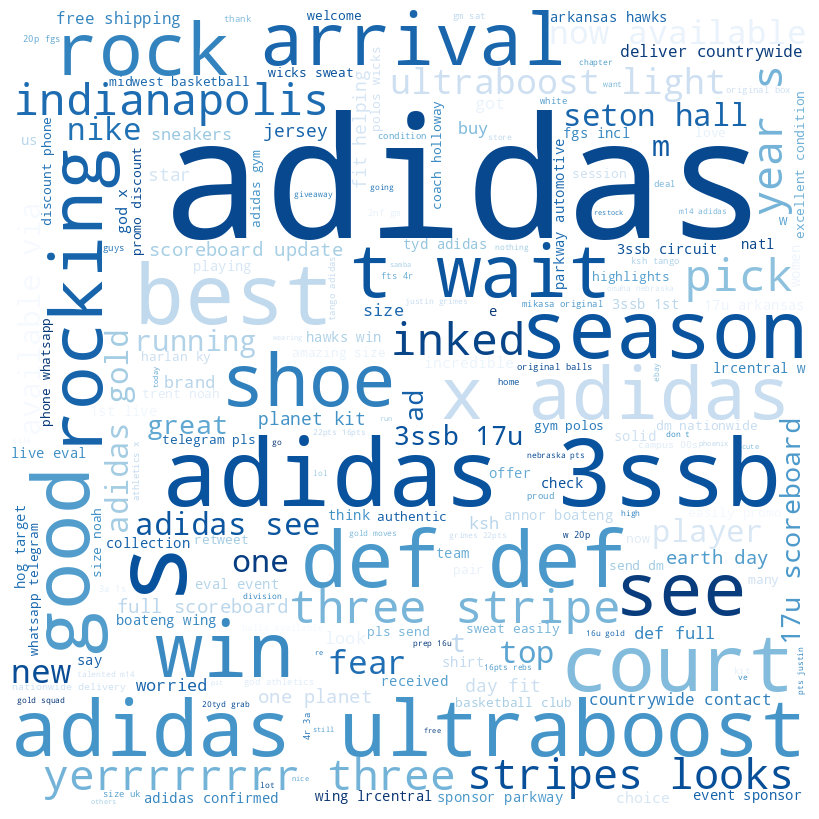

In [54]:
# concatenate all the very positive tweets into a single string
all_tweets = ' '.join(very_positive_tweets['processed_text'])

# generate the word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white', colormap='Blues').generate(all_tweets)

# plot the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [55]:
import nltk
from nltk.corpus import stopwords
import string
from collections import Counter

In [56]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [57]:
all_words = nltk.word_tokenize(all_tweets.lower())
all_words = [word for word in all_words if word not in stopwords.words('english')]
all_words = [word for word in all_words if word not in string.punctuation]

# count the frequency of each word using a dictionary
word_freq = Counter(all_words)

# sort the words by frequency in descending order
sorted_words = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)

# display the top 20 words with their frequencies
top_words = sorted_words[:20]
for word, freq in top_words:
    print(f'{word}: {freq}')

adidas: 387
’: 108
def: 56
available: 49
like: 48
1: 42
17u: 41
size: 41
see: 41
3ssb: 40
good: 38
best: 37
's: 36
win: 35
x: 32
one: 28
gold: 28
scoreboard: 28
season: 28
ultraboost: 28


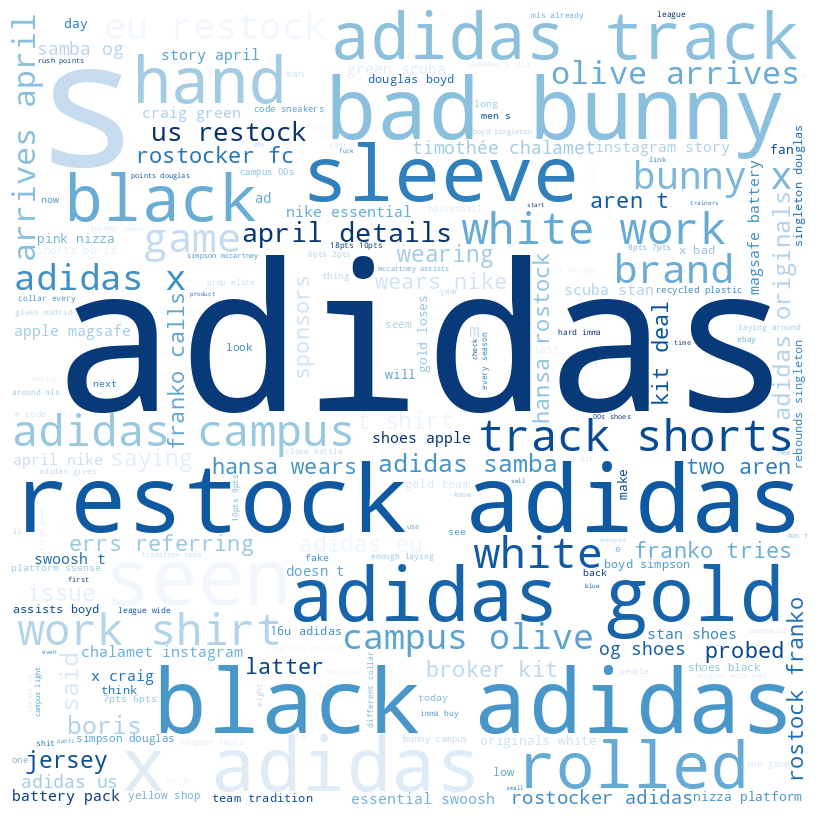

In [58]:
# concatenate all the very positive tweets into a single string
all_tweets=" "
all_tweets = ' '.join(very_negative_tweets['processed_text'])

# generate the word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white', colormap='Blues').generate(all_tweets)

# plot the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Sentiment **Analysis**

In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score


In [60]:
df2 = df[['processed_text', 'sentiment_type']]

In [61]:
X_train, X_test, y_train, y_test = train_test_split(df2['processed_text'], df2['sentiment_type'], random_state=0)


In [62]:
# Convert text into numerical vectors using CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train a Multinomial Naive Bayes classifier
clf = MultinomialNB()
clf.fit(X_train_vec, y_train)

# Predict on the test set
y_pred = clf.predict(X_test_vec)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.8064


**Something** **About** **Location**

/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 127466 (\N{REGIONAL INDICATOR SYMBOL LETTER E}) missing from current font.

/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 127482 (\N{REGIONAL INDICATOR SYMBOL LETTER U}) missing from current font.

/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 127480 (\N{REGIONAL INDICATOR SYMBOL LETTER S}) missing from current font.

/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 127464 (\N{REGIONAL INDICATOR SYMBOL LETTER C}) missing from current font.

/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 127462 (\N{REGIONAL INDICATOR SYMBOL LETTER A}) missing from current font.

/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 127471 (\N{REGIONAL INDICATOR SYMBOL LETTER J}) missing from current font.

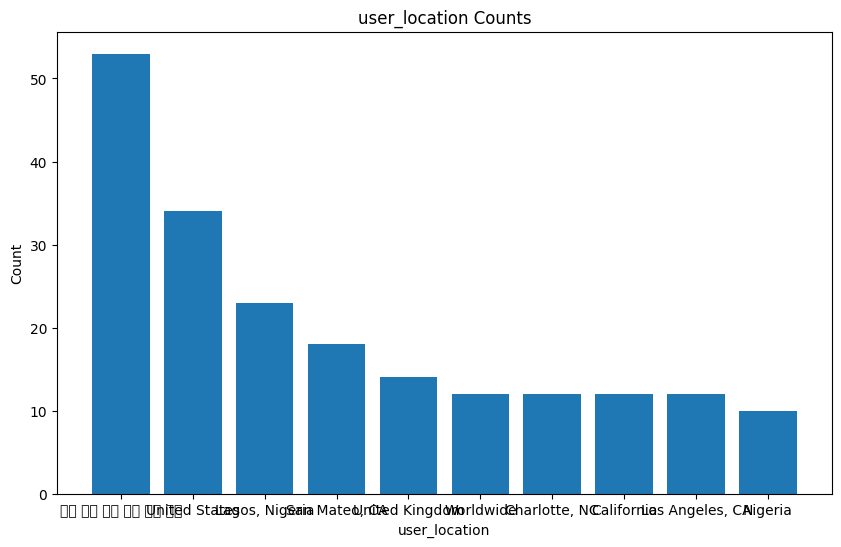

In [43]:
#df2['lang'].value_counts()

import matplotlib.pyplot as plt

lang_counts = df['user_location'].value_counts().head(10)
plt.figure(figsize=(10,6))
plt.bar(lang_counts.index, lang_counts.values)
plt.title('user_location Counts')
plt.xlabel('user_location')
plt.ylabel('Count')
plt.show()


In [44]:
top_location_of_tweet = df['user_location'].value_counts()
top_location_of_tweet.head(20)

🇪🇺 🇺🇸 🇨🇦 🇯🇵 🇨🇳 🇦🇺            53
United States                34
Lagos, Nigeria               23
San Mateo, CA                18
United Kingdom               14
Worldwide                    12
Charlotte, NC                12
California                   12
Los Angeles, CA              12
Nigeria                      10
Austin, TX                   10
contactpluggrr@gmail.com     10
Dallas, TX                    9
California, USA               9
Abuja, Nigeria                8
London, England               8
Tacoma, WA                    7
Herzogenaurach, Germany       7
contactcheapprr@gmail.com     7
Cairo, Egypt                  7
Name: user_location, dtype: int64

**Something about dates** 

but no dates in dataset

In [ ]:
df2['date_column'] = df2['date'].dt.date

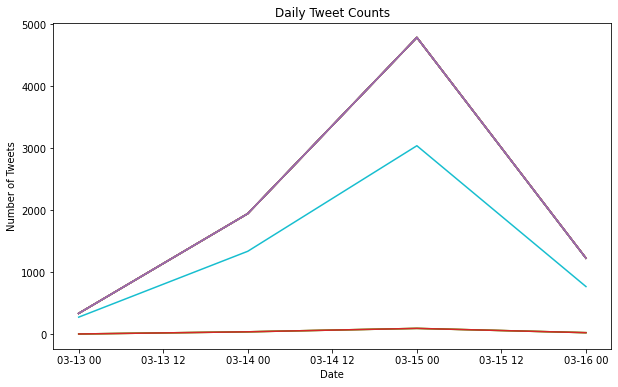

In [ ]:
#Number of Tweets per day

# group the data by day and count the number of tweets per day
daily_counts = df2.groupby(df2['date'].dt.date).count()

# create a line chart of the daily tweet counts
plt.figure(figsize=(10,6))
plt.plot(daily_counts.index, daily_counts.values)
plt.title('Daily Tweet Counts')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.show()





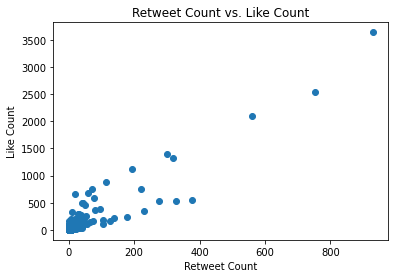

In [ ]:
# Create a scatter plot of retweet count vs. like count
plt.scatter(df2['retweetCount'], df2['likeCount'])
plt.title('Retweet Count vs. Like Count')
plt.xlabel('Retweet Count')
plt.ylabel('Like Count')
plt.show()

In [ ]:
!pip install textblob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
